In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model


In [3]:
user_rating = pd.read_csv('user_rating.csv')

In [4]:
user_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,9,3
1,1,4,2
2,1,5,5
3,1,33,3
4,1,6,2


In [5]:
user_rating.shape

(6404, 3)

In [6]:
user_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6404 entries, 0 to 6403
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        6404 non-null   int64
 1   Place_Id       6404 non-null   int64
 2   Place_Ratings  6404 non-null   int64
dtypes: int64(3)
memory usage: 150.2 KB


In [7]:
n_users = len(user_rating.User_Id.unique())
n_users

300

In [8]:
place_num = len(user_rating.Place_Id.unique())
place_num

34

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(user_rating, test_size=0.2, random_state=42)

In [10]:
train.head()

,User_Id,Place_Id,Place_Ratings
1732,83,24,4
748,37,28,5
4434,209,7,5
1310,63,2,5
5340,251,13,4


In [11]:
test.head()

,User_Id,Place_Id,Place_Ratings
2488,119,24,3
5476,258,6,4
2399,115,29,3
1330,64,20,4
4990,235,25,3


In [12]:
# creating destination embedding path
destination_input = Input(shape=[1])
destination_embedding = Embedding(place_num+1, 5)(destination_input)
destination_flat = Flatten()(destination_embedding)

# creating user embedding path
user_input = Input(shape=[1])
user_embedding = Embedding(n_users+1, 5)(user_input)
user_flat = Flatten()(user_embedding)

# concatenate features
conc = Concatenate()([destination_flat, user_flat])

# add fully-connected-layers
x = Dense(128, activation='relu')(conc)
x = Dense(64, activation='relu')(x)
output = Dense(1)(x)

# Create model and compile it
model = Model([user_input, destination_input], output)
model.compile('adam', 'mean_squared_error')

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 5)                 175       ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 5)                 1505      ['input_2[0][0]']             
                                                                                              

In [14]:
history = model.fit([train.User_Id, train.Place_Id], train.Place_Ratings, epochs=20)



Epoch 1/20

161/161 [==============================] - 3s 3ms/step - loss: 3.6573
Epoch 2/20
161/161 [==============================] - 0s 2ms/step - loss: 1.8785
Epoch 3/20
161/161 [==============================] - 0s 2ms/step - loss: 1.8417
Epoch 4/20
161/161 [==============================] - 1s 3ms/step - loss: 1.8201
Epoch 5/20
161/161 [==============================] - 1s 4ms/step - loss: 1.8033
Epoch 6/20
161/161 [==============================] - 0s 3ms/step - loss: 1.8076
Epoch 7/20
161/161 [==============================] - 0s 2ms/step - loss: 1.8013
Epoch 8/20
161/161 [==============================] - 0s 2ms/step - loss: 1.7928
Epoch 9/20
161/161 [==============================] - 0s 2ms/step - loss: 1.7903
Epoch 10/20
161/161 [==============================] - 0s 2ms/step - loss: 1.7993
Epoch 11/20
161/161 [==============================] - 0s 2ms/step - loss: 1.7871
Epoch 12/20
161/161 [==============================] - 0s 2ms/step - loss: 1.7832
Epoch 13/20
161/161 [===

Text(0, 0.5, 'Training Error')

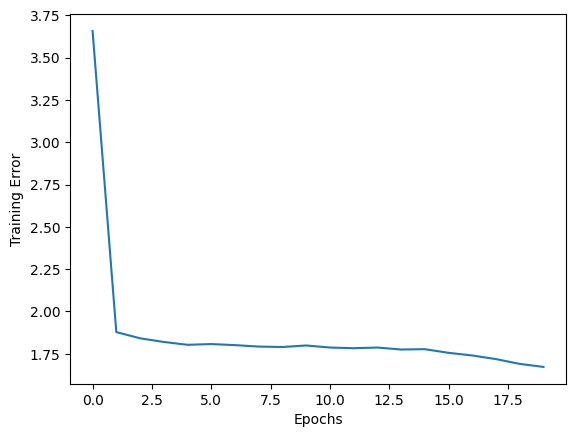

In [15]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [16]:
model.evaluate([test.User_Id, test.Place_Id], test.Place_Ratings)

41/41 [==============================] - 0s 2ms/step - loss: 2.1069


2.106867790222168

In [17]:
model.save('model.h5')

c:\Users\u\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
# Creating dataset for making recommendations for the first user
tourism_data = np.array(list(set(user_rating.Place_Id)))
tourism_data[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
id_user = 3

In [24]:
user = np.array([id_user for i in range(len(tourism_data))])
user[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Predict

In [25]:
predictions = model.predict([user, tourism_data])

predictions = np.array([a[0] for a in predictions])

recommended_tourism_ids = (-predictions).argsort()[:10]

recommended_tourism_ids

2/2 [==============================] - 0s 16ms/step


array([ 2, 10, 17,  6, 19, 18,  1, 22, 20, 13], dtype=int64)

In [29]:
bali_dataset = pd.read_csv('bali_dataset.csv')
recommended_places = bali_dataset.loc[recommended_tourism_ids, 'Place']
recommended_places

26                   Sukawati Art Market
32                      Goa Lawah Temple
10         Besakih Temple (Pura Besakih)
29                   Penglipuran Village
22                        Waterboom Bali
33                    Pantai Batu Bolong
9                         Nusa Dua Beach
0                              Tanah Lot
8                         Seminyak Beach
16    Garuda Wisnu Kencana Cultural Park
Name: Place, dtype: object

In [24]:
# print predicted scores
predictions[recommended_tourism_ids]

array([4.0293217, 4.023179 , 3.9800317, 3.9422963, 3.9216635, 3.8477647,
       3.8469775, 3.754464 , 3.721109 , 3.6950164], dtype=float32)

In [30]:

import joblib
joblib.dump(model, 'model.pkl')


['model.pkl']

In [31]:
%pip install tensorflowjs


  Using cached tf_keras-2.16.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorflow_decision_forests-1.8.1.tar.gz (15.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached packaging-23.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached optax-0.2.2-py3-none-any.whl.metadata (8.1 kB)
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
INFO: pip is looking at multiple versions of tensorflow-intel to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflowjs-4.19.0-py3-none-any.whl.metadata (3.2 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements.

  You can safely remove it manually.
  You can safely remove it manually.



   -------- ------------------------------ 66.8/300.8 MB 192.6 kB/s eta 0:20:15
   -------- ------------------------------ 66.8/300.8 MB 192.6 kB/s eta 0:20:15
   -------- ------------------------------ 66.8/300.8 MB 192.6 kB/s eta 0:20:15
   -------- ------------------------------ 66.9/300.8 MB 193.5 kB/s eta 0:20:09
   -------- ------------------------------ 66.9/300.8 MB 193.5 kB/s eta 0:20:09
   -------- ------------------------------ 66.9/300.8 MB 193.5 kB/s eta 0:20:09
   -------- ------------------------------ 66.9/300.8 MB 193.5 kB/s eta 0:20:09
   -------- ------------------------------ 66.9/300.8 MB 193.1 kB/s eta 0:20:12
   -------- ------------------------------ 66.9/300.8 MB 193.1 kB/s eta 0:20:12
   -------- ------------------------------ 66.9/300.8 MB 193.1 kB/s eta 0:20:12
   -------- ------------------------------ 66.9/300.8 MB 193.1 kB/s eta 0:20:12
   -------- ------------------------------ 66.9/300.8 MB 193.1 kB/s eta 0:20:12
   -------- ---------------------------

In [ ]:
# from tensorflow.keras import tensorflowjs
# import tensorflowjs_converter

!tensorflowjs_converter --input_format=keras_saved_model /tmp/saved_model/model.h5 /tmp/tfjs_model

2024-06-12 15:26:19.251312: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-12 15:26:20.581389: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-12 15:26:23.033589: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-06-12 15:26:23.056473: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_1/bias/Assign' id:85 op device:{requested: '', assigned: ''} def:{{{node dense_1/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_1/bias, dense_1/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will tr

In [3]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

# Load your model
model = tf.keras.models.load_model('model.h5')

# Save the model in TensorFlow.js format
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, '/tfjs_model')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
import tensorflowjs as tfjs

model = tfjs.converters.load_keras_model('/content/model.json')

TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 1], 'dtype': 'float32', 'sparse': False, 'name': 'Tourism-Input'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']

In [ ]:
import tensorflow as tf
import numpy as np

# 1. Load the original model
model = tf.keras.models.load_model('/tmp/saved_model/model.h5')
id_user = 3
tourism_data = np.array(list(set(tourism.Place_Id)))
user = np.array([id_user for i in range(len(tourism_data))])
predictions = model.predict([user, tourism_data])
print(predictions)


2/2 [==============================] - 0s 8ms/step
[[3.4076881]
 [3.0568938]
 [3.2066565]
 [3.1751027]
 [3.05053  ]
 [2.6505113]
 [3.121303 ]
 [2.49585  ]
 [4.1530066]
 [3.4044714]
 [3.2054505]
 [3.059957 ]
 [3.9925702]
 [3.7413173]
 [2.3874526]
 [3.4365938]
 [3.2726417]
 [4.0704308]
 [3.0497398]
 [3.136709 ]
 [2.5030284]
 [3.9027784]
 [3.8646889]
 [3.2867548]
 [3.7738962]
 [3.0389977]
 [3.5363355]
 [3.4438457]
 [3.0513716]
 [3.0935202]
 [2.8665113]
 [3.3676395]
 [2.6763334]
 [2.466905 ]]


In [ ]:
shape = len(predictions)
print(shape)
print(57-39)
print(len(tourism_data))

32
18
32
